<a href="https://colab.research.google.com/github/almirars/PCVK_ALMIRA/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Gamma Correction pada citra
--------------------------------
Masukkan nilai gamma: 3


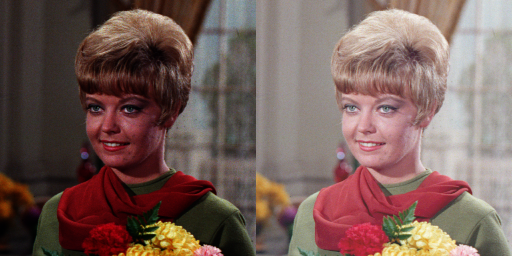

In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

print('Gamma Correction pada citra')
print('--------------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)
invGamma = 1/gamma

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(((original[y,x,c]/255) ** invGamma) * 255, 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

TUGAS 3

Nilai PSNR adalah 27.536073966869555 (dB)


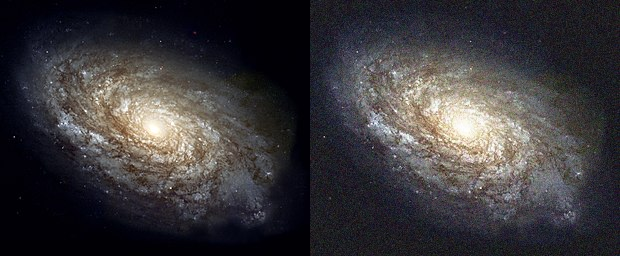

In [7]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR Average 30 adalah 28.44189640688837 (dB)


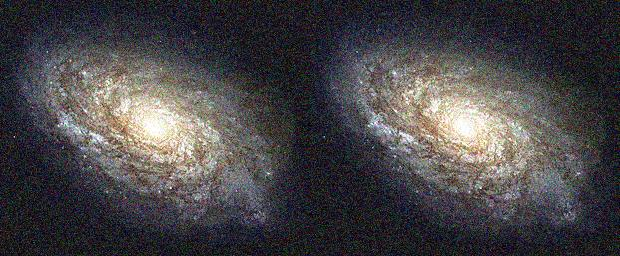

In [8]:
#average 30
ori_img = cv_img[0]
noise_img = cv_img[30]

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 30 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, noise_img))
cv2_imshow(final_frame)

Nilai PSNR Average 60 adalah 28.437893387847723 (dB)


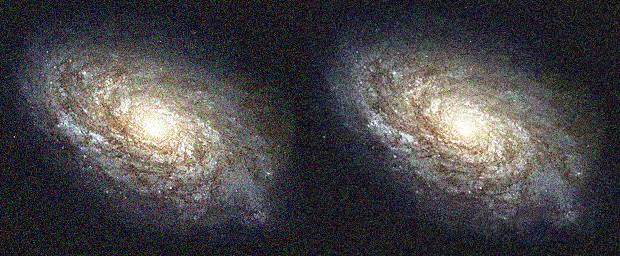

In [9]:
#average 60
ori_img = cv_img[0]
noise_img = cv_img[60]

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 60 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, noise_img))
cv2_imshow(final_frame)

Nilai PSNR Average 80 adalah 28.438688722785198 (dB)


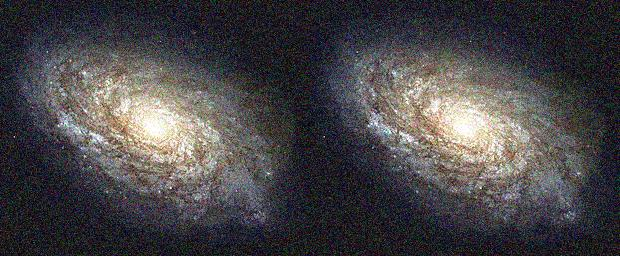

In [10]:
#average 80
ori_img = cv_img[0]
noise_img = cv_img[80]

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 80 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, noise_img))
cv2_imshow(final_frame)

Nilai PSNR Average 100 adalah 28.429361418618853 (dB)


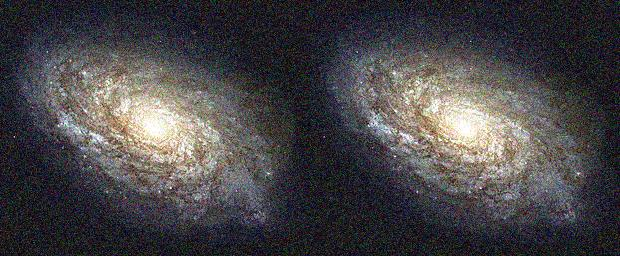

In [11]:
#average 100
ori_img = cv_img[0]
noise_img = cv_img[99]

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 100 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, noise_img))
cv2_imshow(final_frame)

TUGAS 2

Bit Depth pada citra
--------------------------------
Masukkan nilai bit: 1


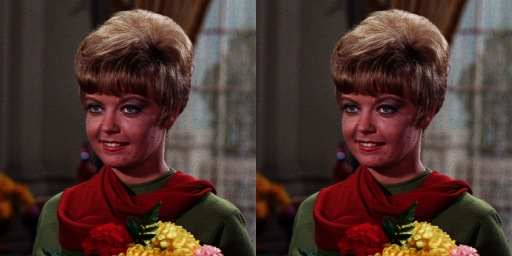

In [12]:
print('Bit Depth pada citra')
print('--------------------------------')
try:
  bit_depth = int(input('Masukkan nilai bit: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
bit_img = np.zeros(original.shape, original.dtype)
bd = 2**bit_depth
level = 255/(bd-1)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      bit_img[y,x,c] = np.clip(round((original[y,x,c]/level)*level), 0, 255)

final_frame = cv.hconcat((original, bit_img))
cv2_imshow(final_frame)

TUGAS 4

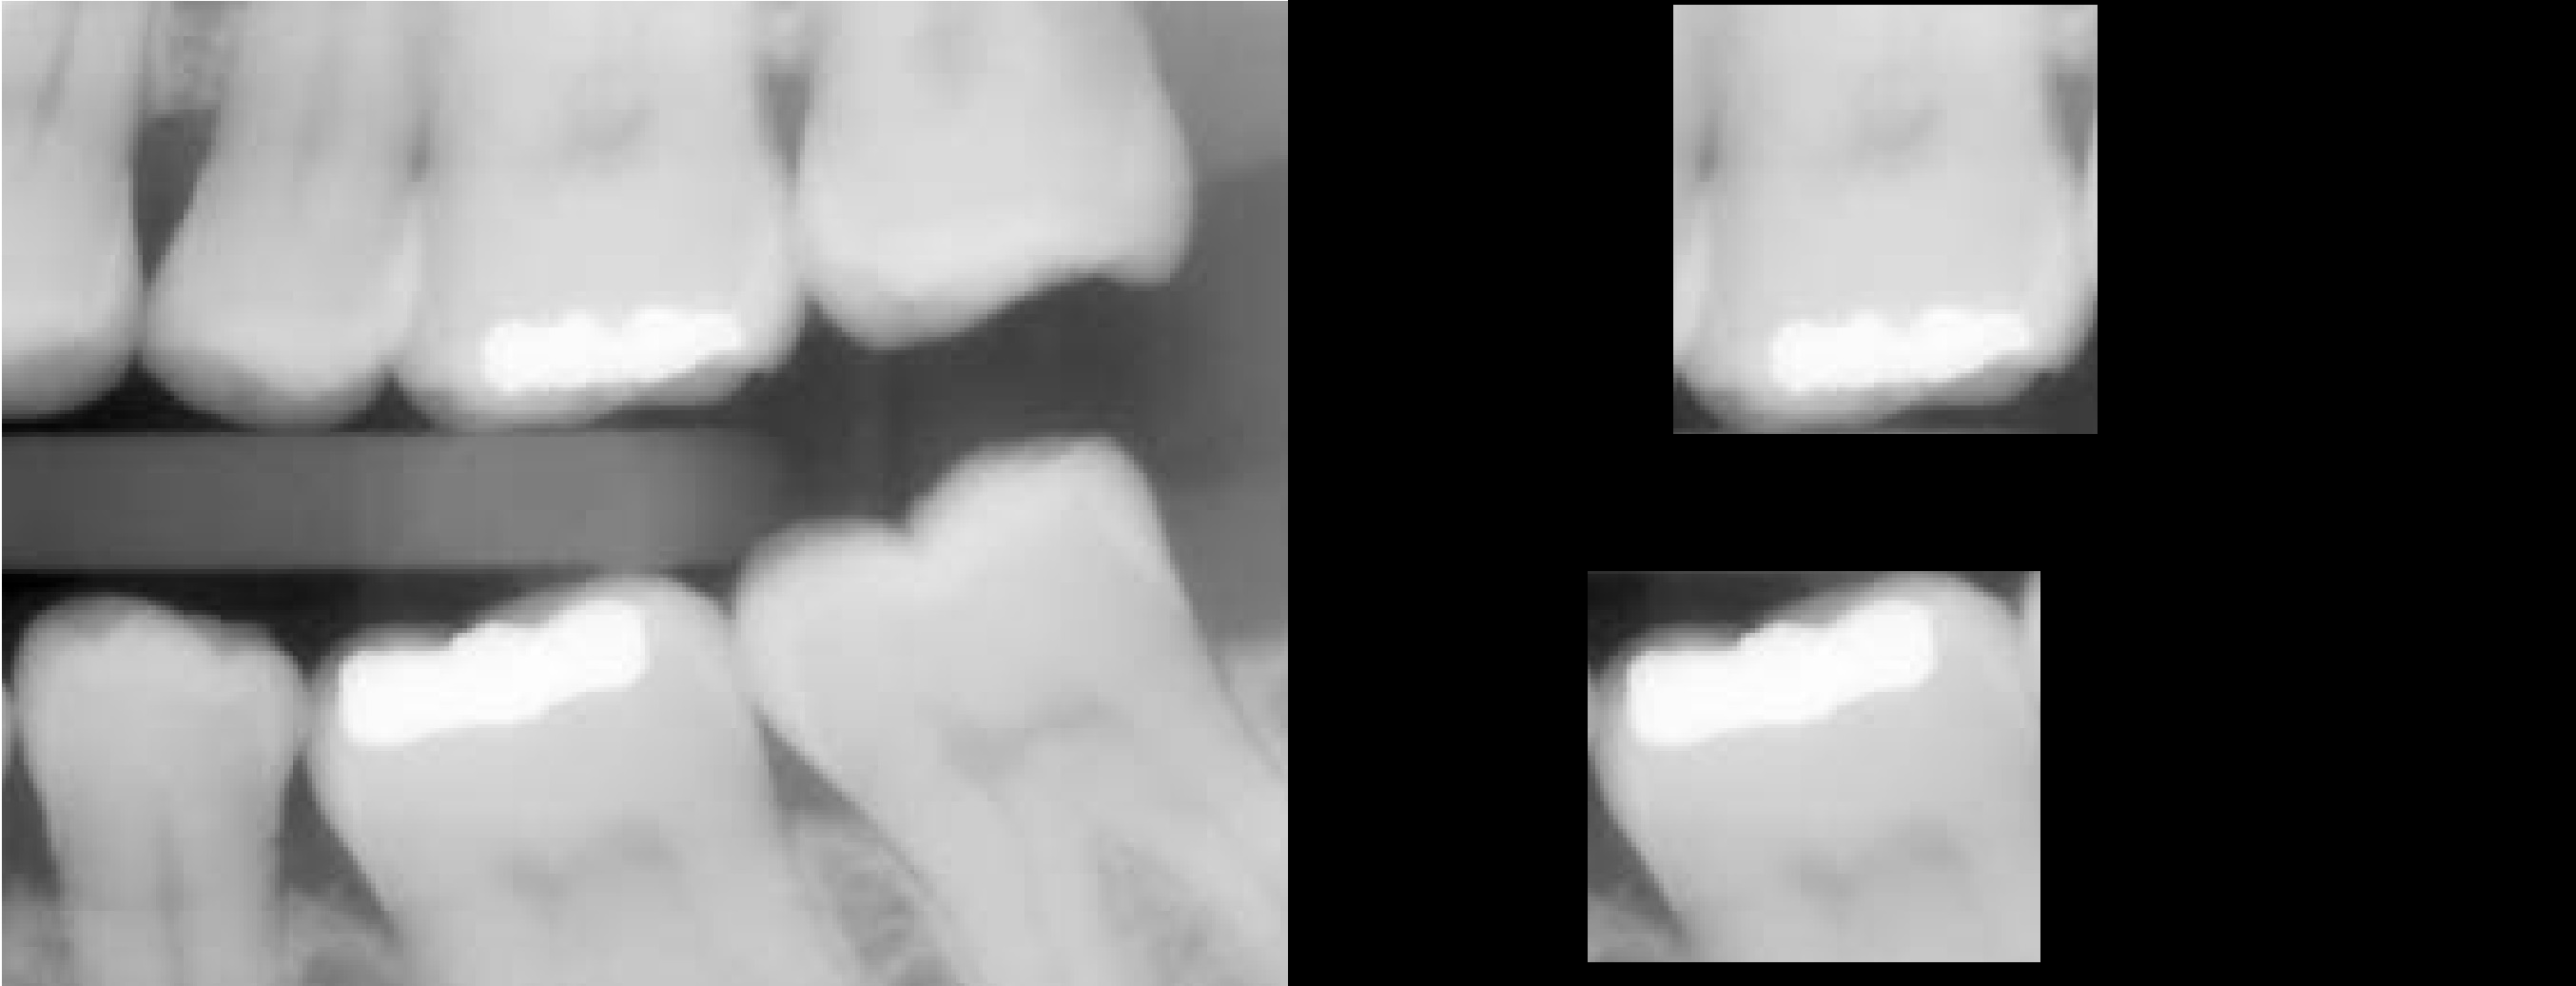

In [16]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')

# creating a square of zeros using a variable
# rectangle = np.zeros((300, 300), dtype="uint8")
# cv.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
# cv2_imshow(rectangle)

# creating a mask of that has the same dimensions of the image
# where each pixel is valued at 0
mask = np.zeros(image.shape[:2], dtype="uint8")

# creating a rectangle on the mask
# where the pixels are valued at 255
cv.rectangle(mask, (405, 5), (850, 455), 255, -1)
cv.rectangle(mask, (315, 600), (790, 1010), 255, -1)

# performing a bitwise_and with the image and the mask
masked = cv.bitwise_and(image, image, mask=mask)

final_frame = cv.hconcat((image, masked))
cv2_imshow(final_frame)

**OR**

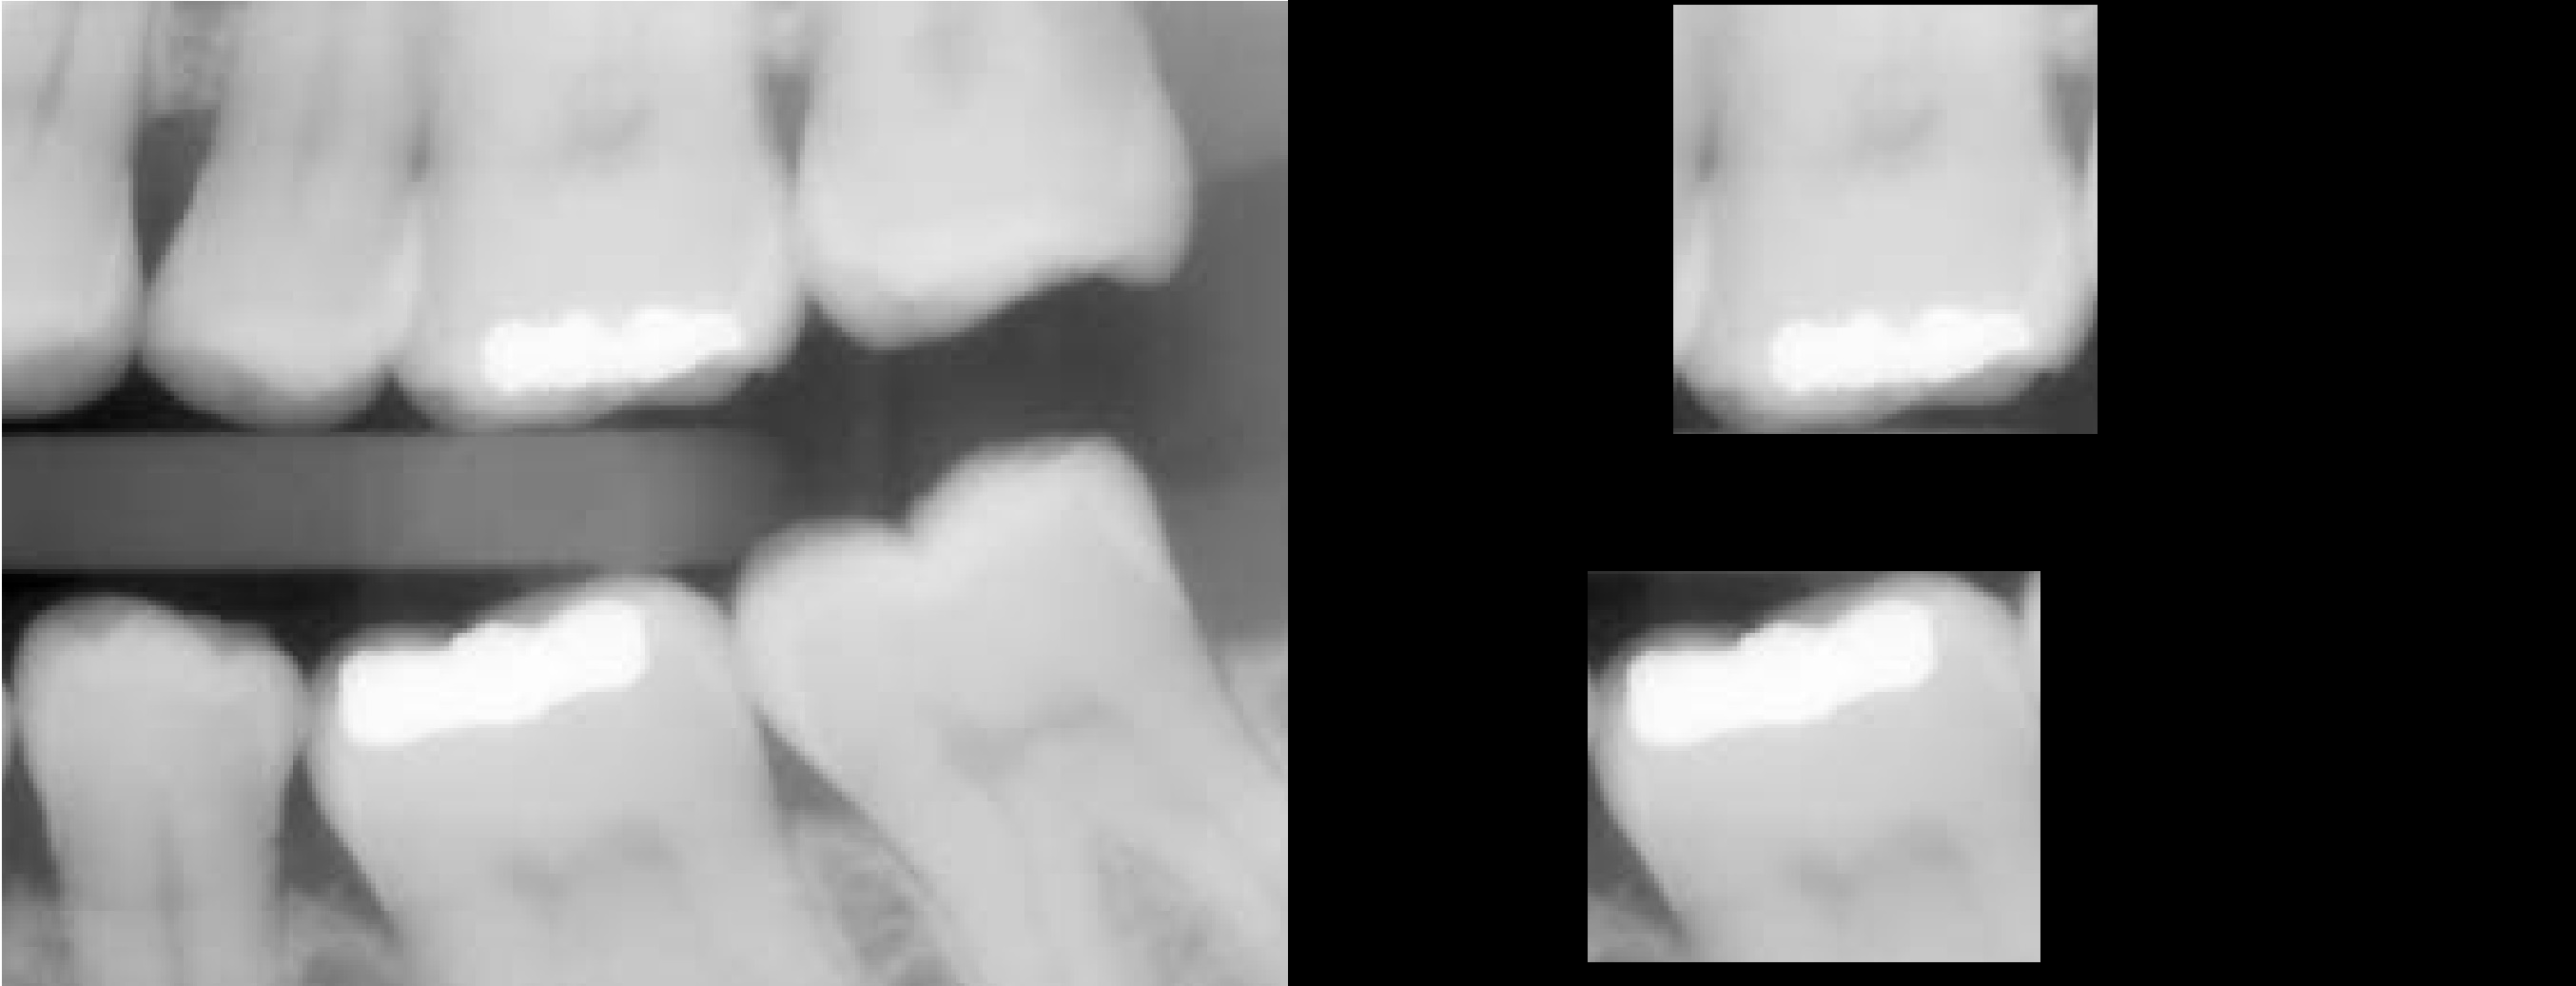

In [14]:
image1 = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')

mask_or = np.zeros(image1.shape[:2], dtype="uint8")

cv.rectangle(mask_or, (405, 5), (850, 455), 255, -1)
cv.rectangle(mask_or, (315, 600), (790, 1010), 255, -1)

masked1 = cv.bitwise_or(image1, image1, mask=mask_or)

final_frame = cv.hconcat((image1, masked1))
cv2_imshow(final_frame)

**NOT**

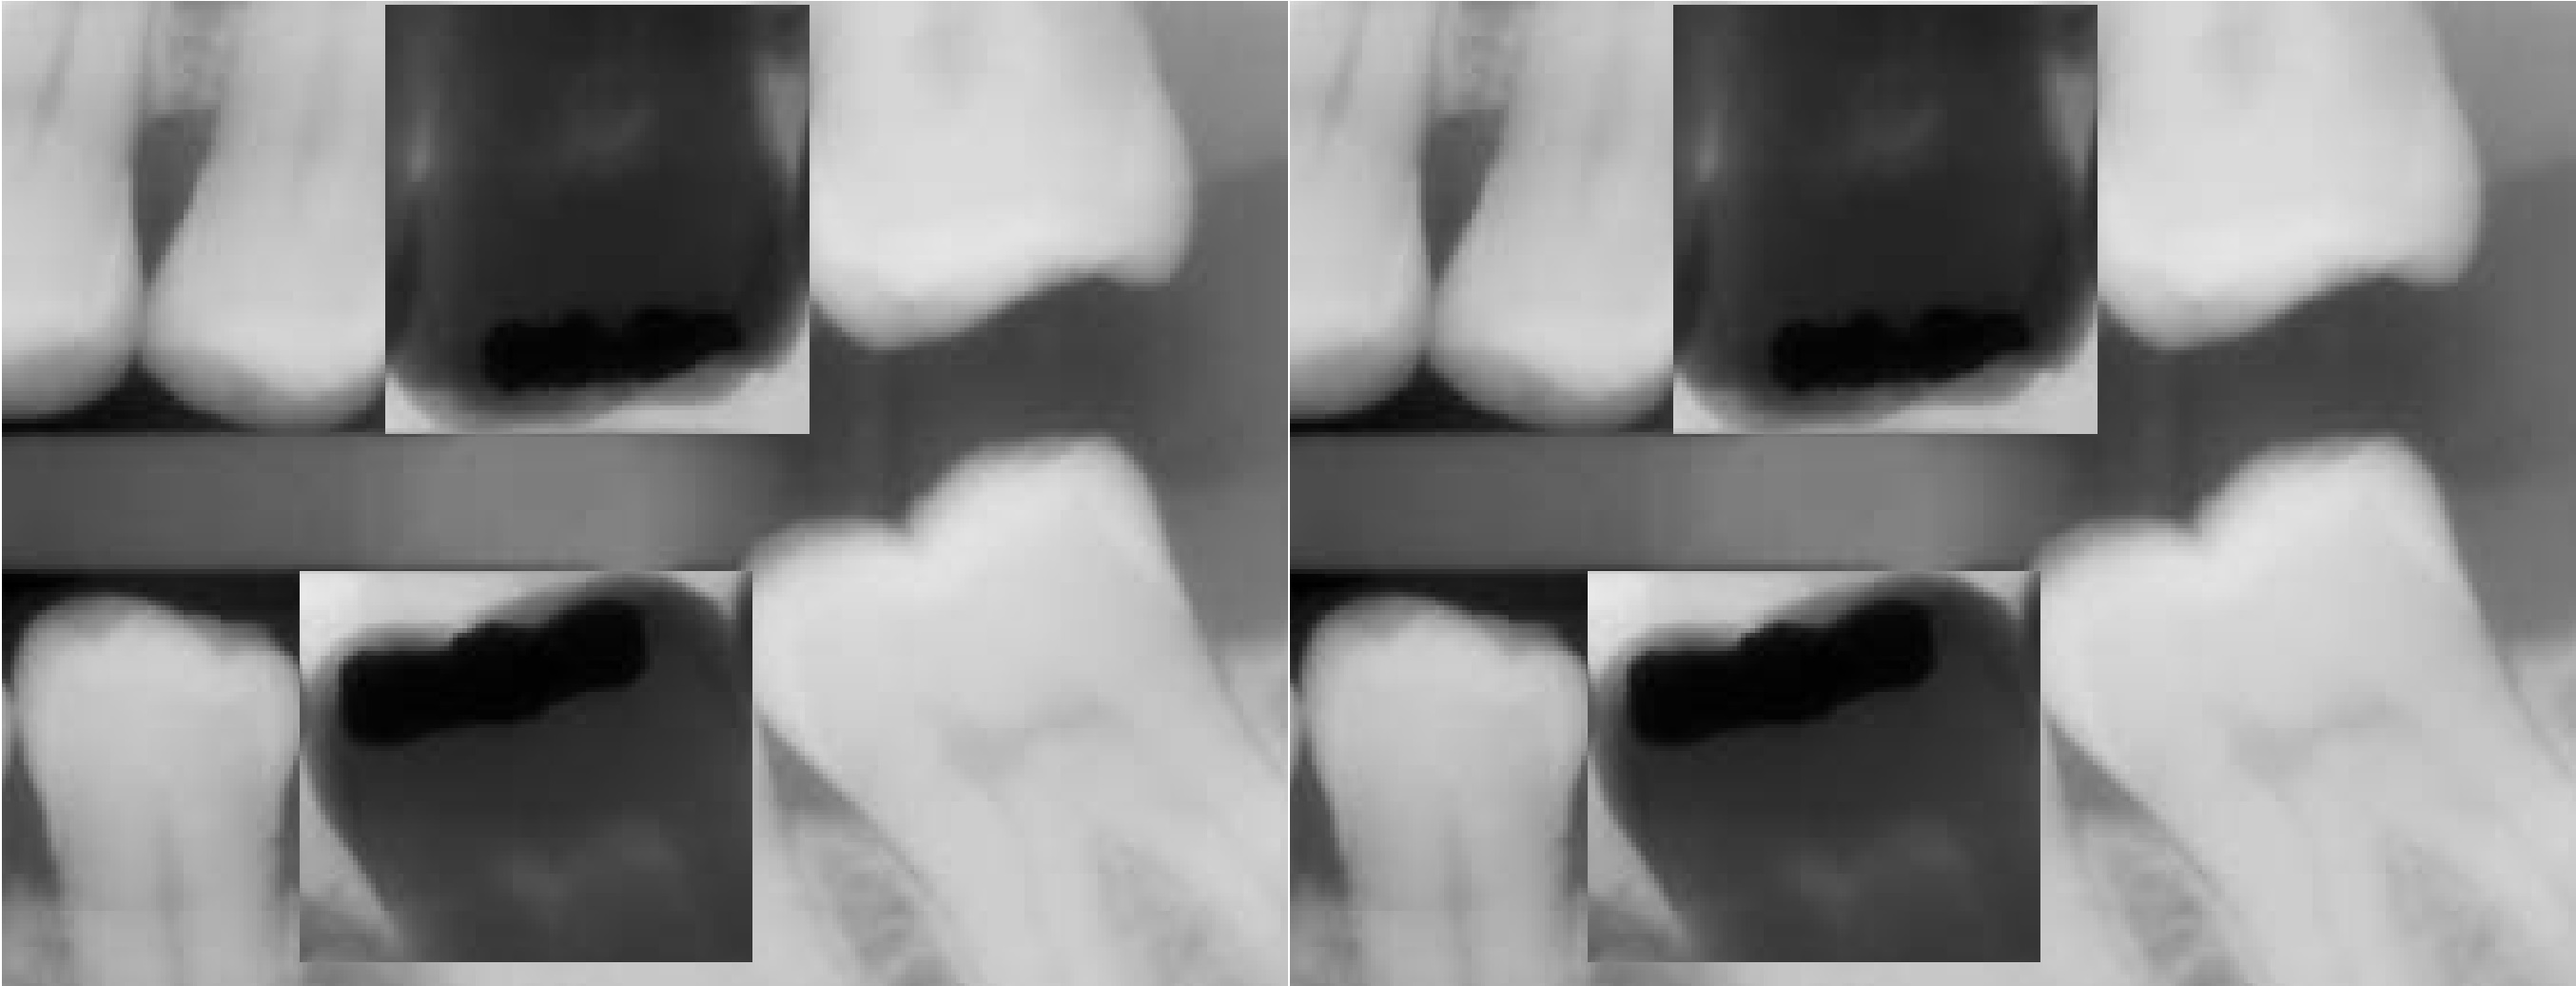

In [15]:
image2 = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')

mask_not = np.zeros(image2.shape[:2], dtype="uint8")

cv.rectangle(mask_not, (405, 5), (850, 455), 255, -1)
cv.rectangle(mask_not, (315, 600), (790, 1010), 255, -1)

masked2 = cv.bitwise_not(image2, image2, mask=mask_not)

final_frame = cv.hconcat((image2, masked2))
cv2_imshow(final_frame)

**NAND**

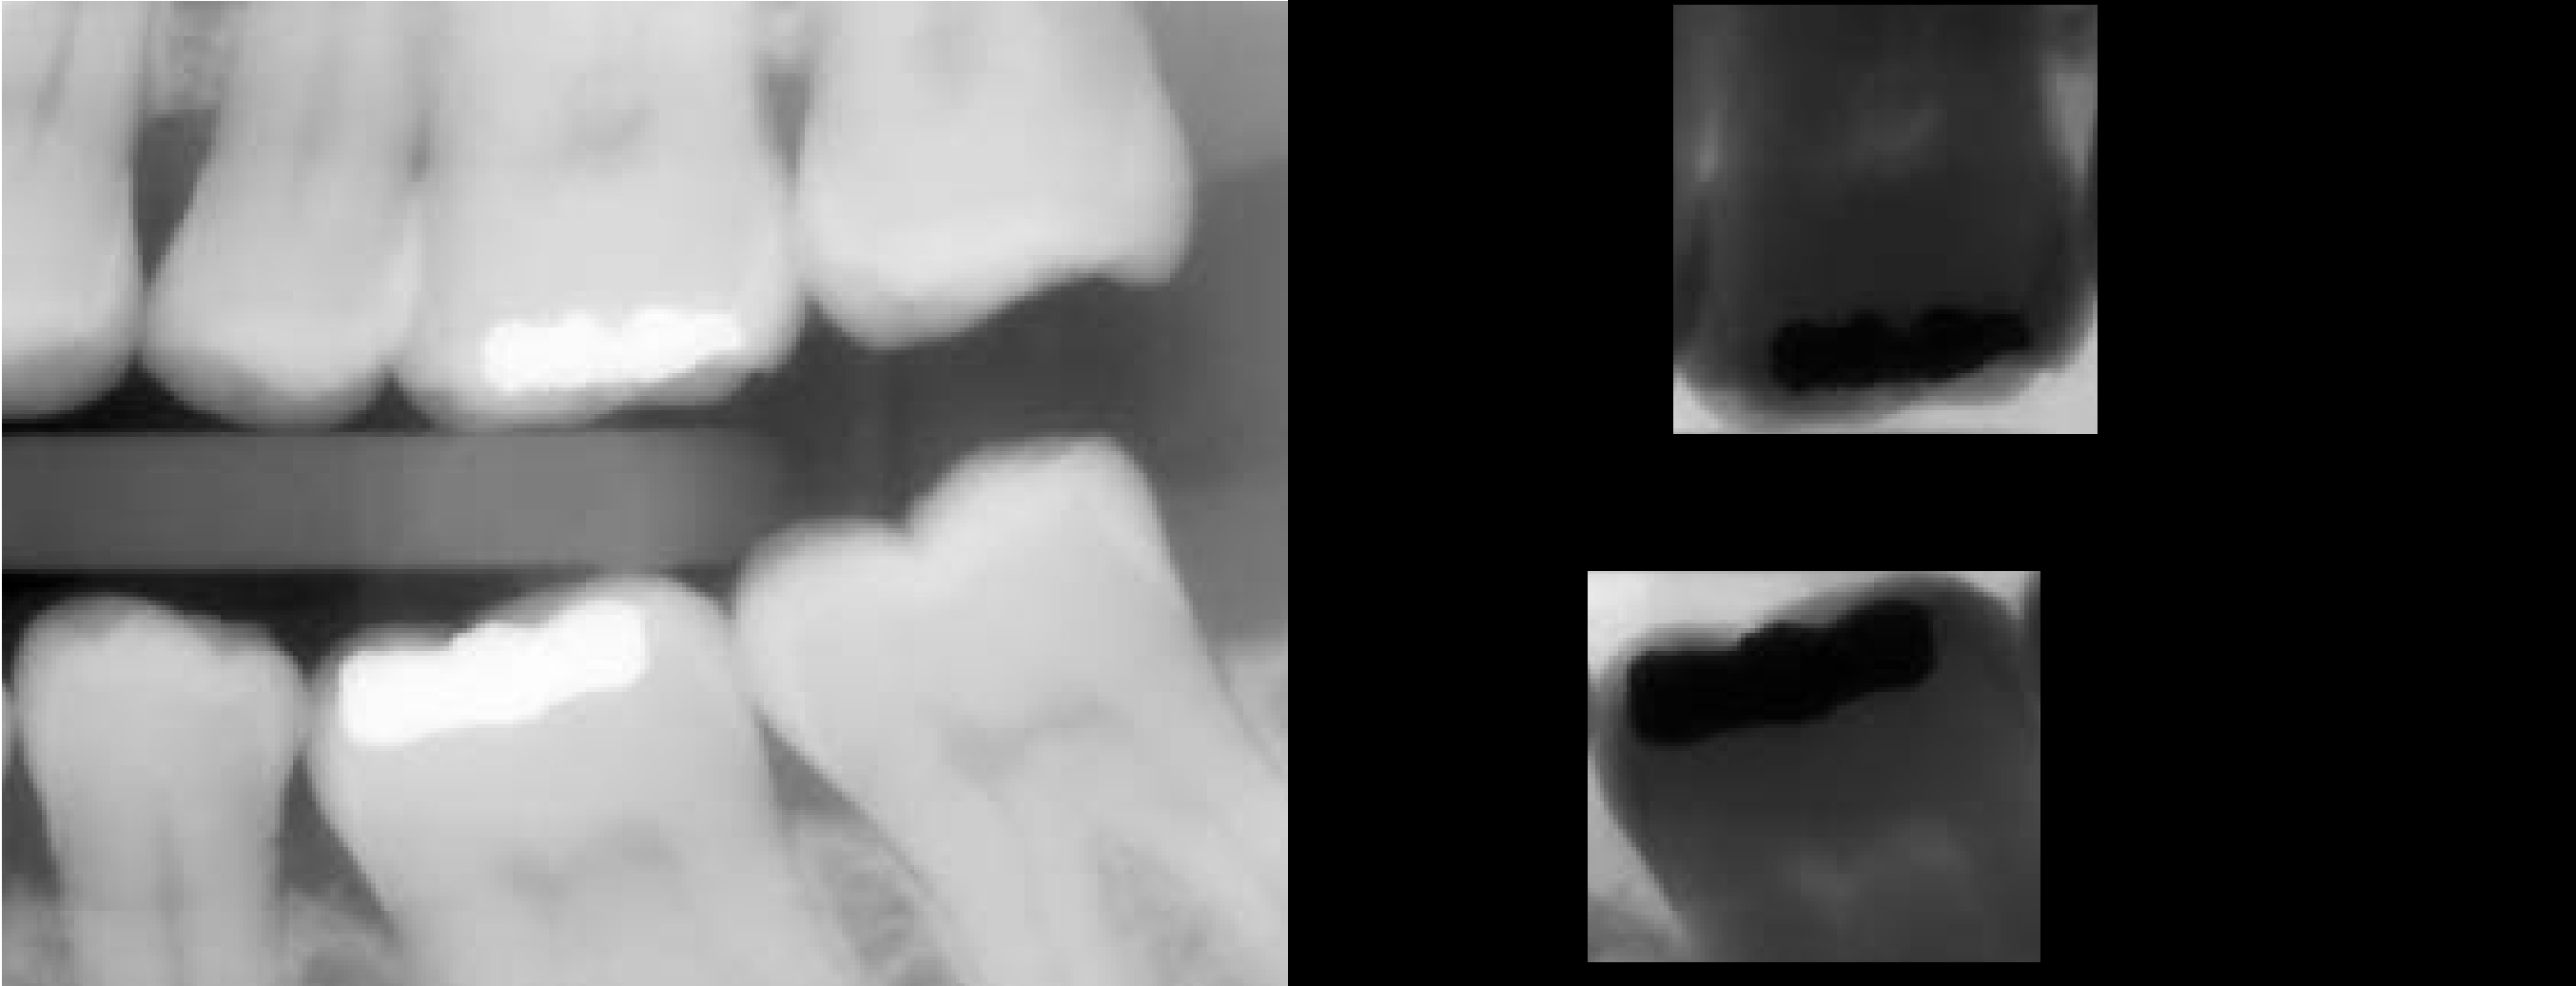

In [17]:
image3 = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')

mask_nand = np.zeros(image3.shape[:2], dtype="uint8")

cv.rectangle(mask_nand, (405, 5), (850, 455), 255, -1)
cv.rectangle(mask_nand, (315, 600), (790, 1010), 255, -1)

masked_and = cv.bitwise_and(image3, image3, mask=mask)
masked_not = cv.bitwise_not(masked_and, masked_and, mask=mask_nand)

final_frame = cv.hconcat((image3, masked_not))
cv2_imshow(final_frame)

**XOR**

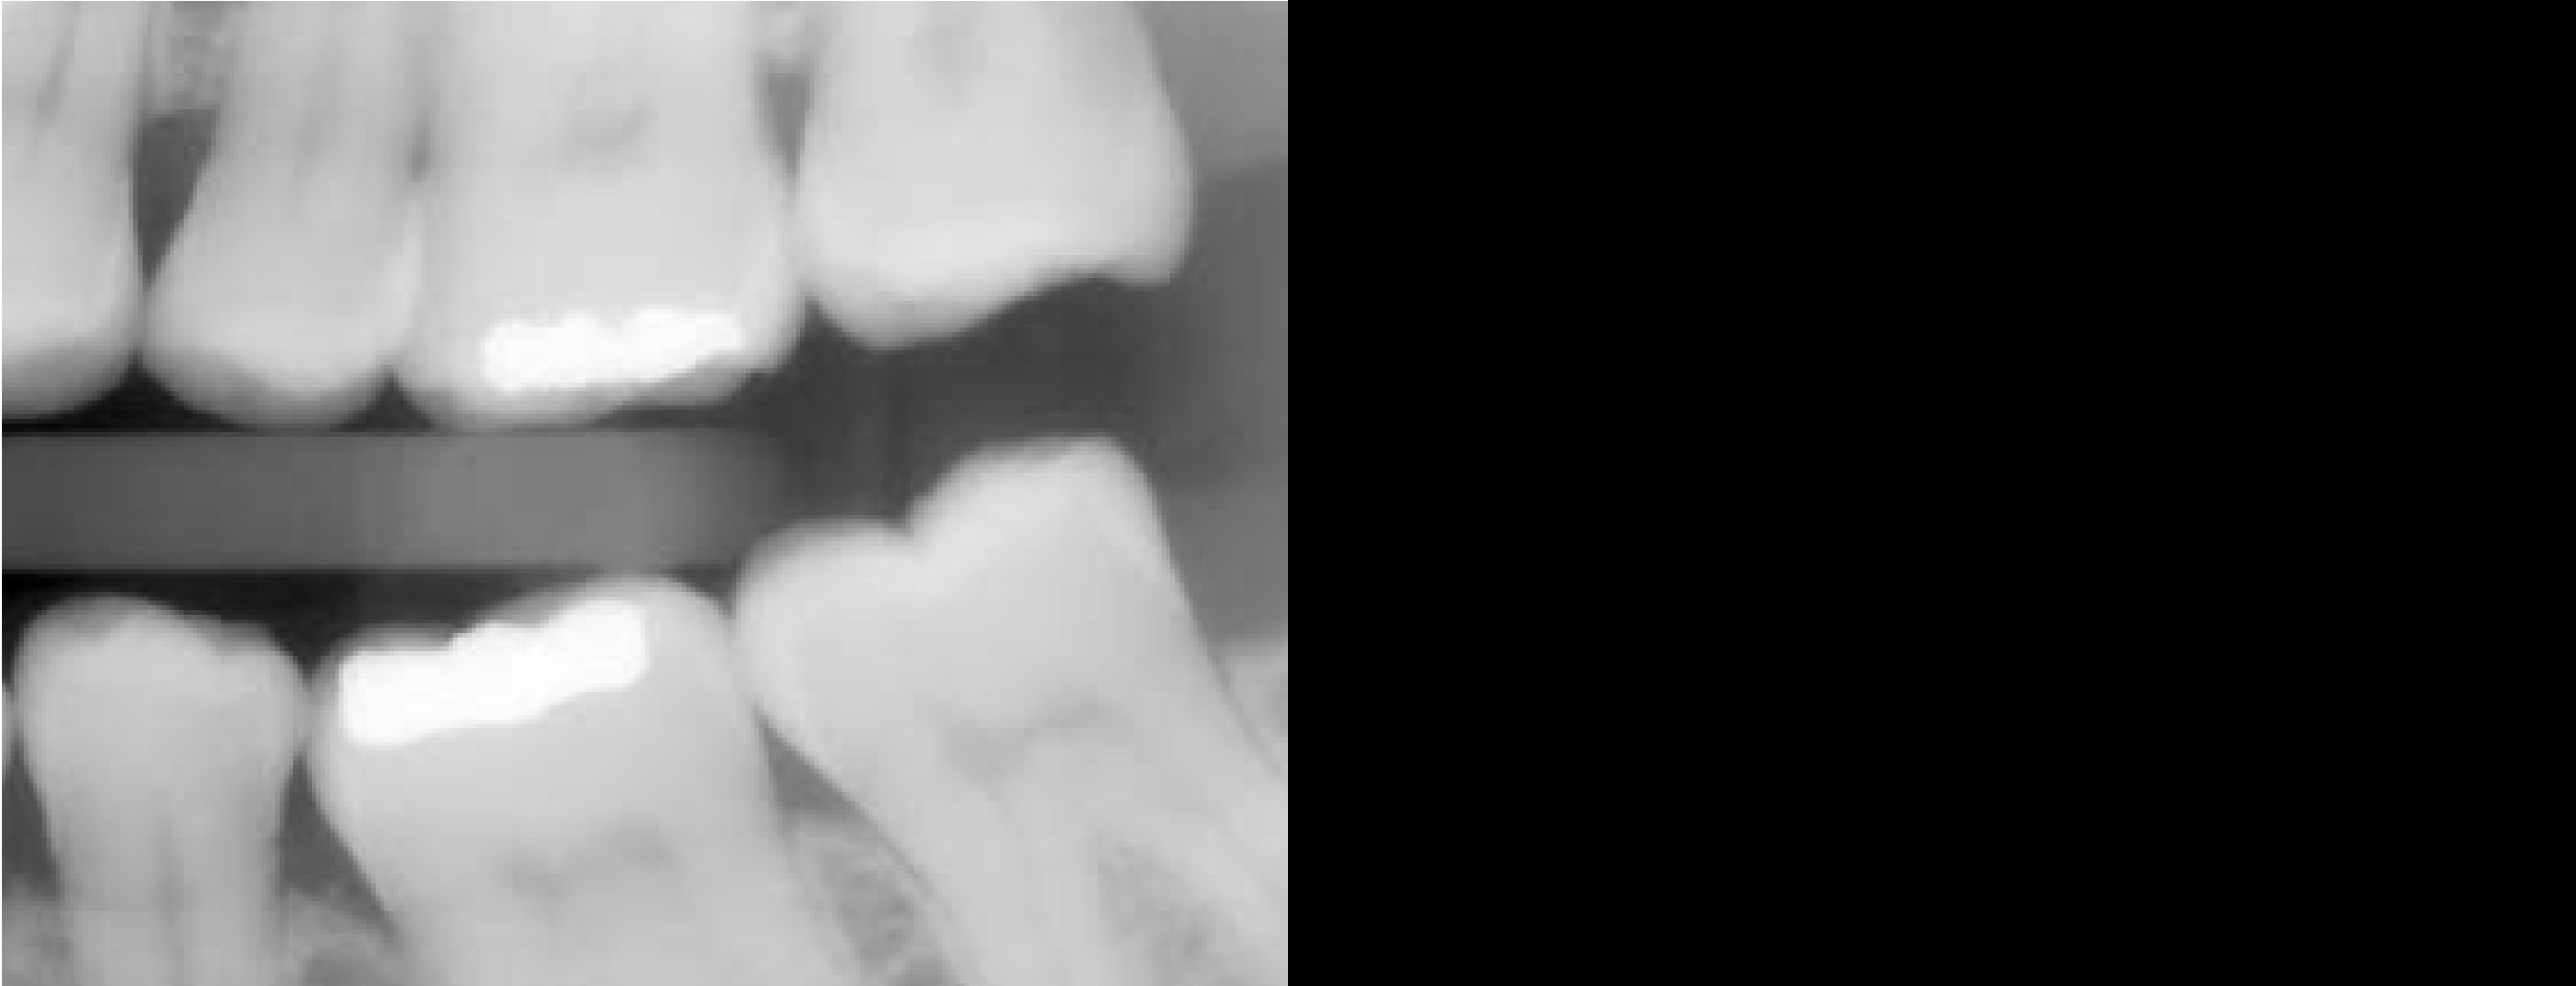

In [18]:
image4 = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')

mask_xor = np.zeros(image4.shape[:2], dtype="uint8")

cv.rectangle(mask_xor, (405, 5), (850, 455), 255, -1)
cv.rectangle(mask_xor, (315, 600), (790, 1010), 255, -1)

masked4 = cv.bitwise_xor(image4, image4, mask=mask_xor)

final_frame = cv.hconcat((image4, masked4))
cv2_imshow(final_frame)